In [1]:
from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import tensorflow as tf

#Prevent TensorFlow from taking up all of GPU memory
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

warnings.simplefilter('ignore', UserWarning)

from util import *

In [2]:
data_dim = 2
data_size = 10000

X1, X2, y1, y2, columns = generate_lipton(scale=True, num_pts=data_size)
name1 = 'men'
name2 = 'women'

Epoch 0 [D loss: 0.000020] [G loss: 0.000151]


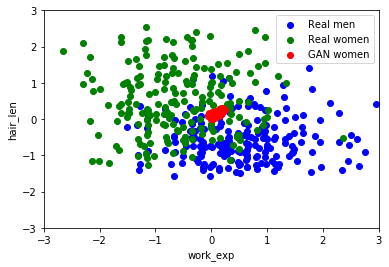

Epoch 1000 [D loss: -0.000829] [G loss: 0.001022]


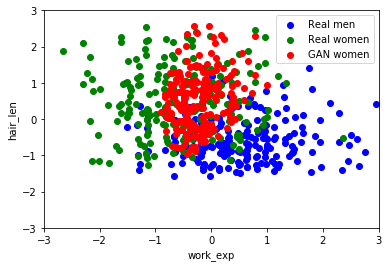

Epoch 2000 [D loss: 0.000060] [G loss: 0.001545]


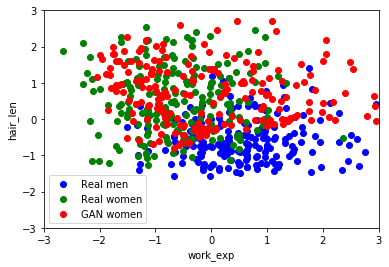

Epoch 3000 [D loss: -0.000043] [G loss: 0.000936]


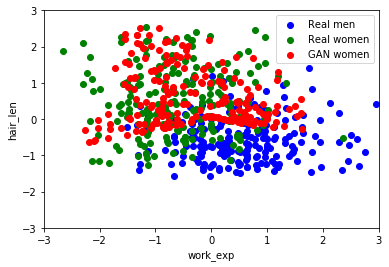

Epoch 4000 [D loss: -0.000052] [G loss: 0.000673]


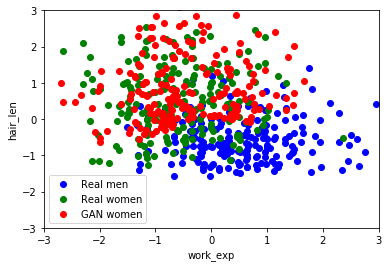

Epoch 5000 [D loss: 0.000067] [G loss: 0.000570]


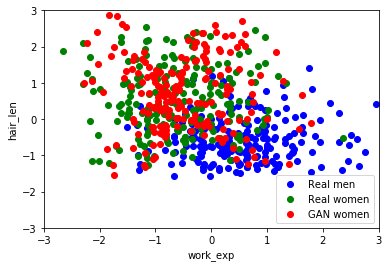

Epoch 6000 [D loss: 0.000083] [G loss: 0.000539]


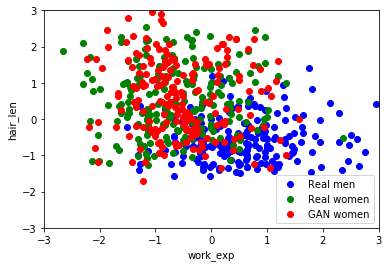

Epoch 7000 [D loss: -0.000005] [G loss: 0.000431]


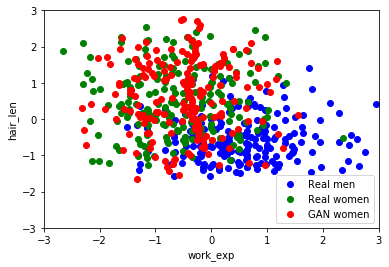

Epoch 8000 [D loss: 0.000025] [G loss: 0.000305]


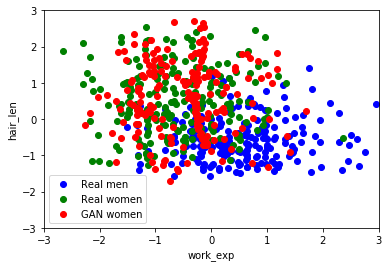

Epoch 9000 [D loss: 0.000007] [G loss: 0.000193]


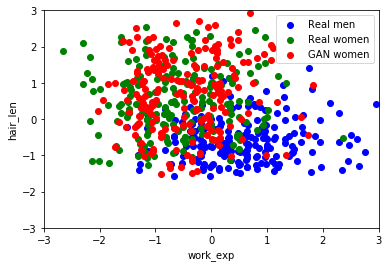

Epoch 10000 [D loss: 0.000129] [G loss: 0.000155]


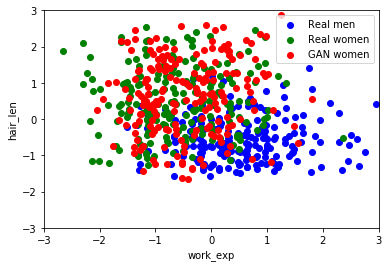

Epoch 11000 [D loss: 0.000049] [G loss: -0.000038]


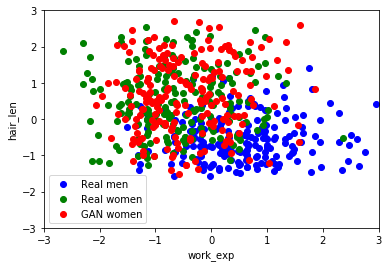

Epoch 12000 [D loss: -0.000032] [G loss: 0.000162]


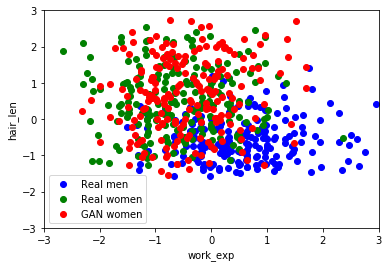

Epoch 13000 [D loss: -0.000005] [G loss: 0.000306]


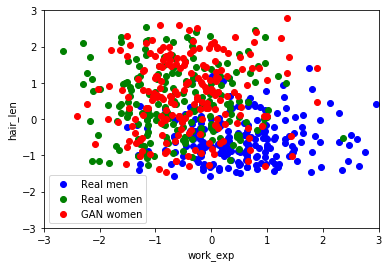

Epoch 14000 [D loss: 0.000028] [G loss: 0.000346]


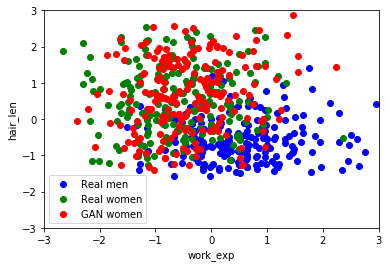

Epoch 15000 [D loss: 0.000027] [G loss: 0.000319]


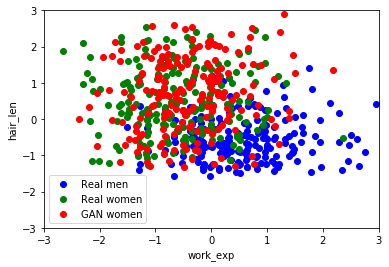

Epoch 16000 [D loss: 0.000103] [G loss: 0.000266]


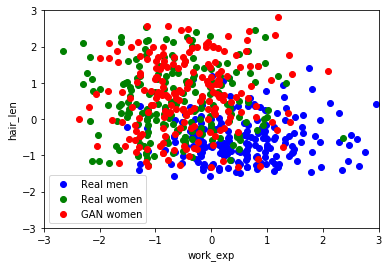

Epoch 17000 [D loss: 0.000032] [G loss: 0.000431]


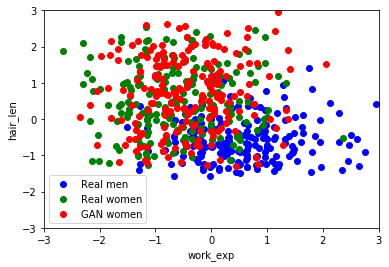

Epoch 18000 [D loss: 0.000003] [G loss: 0.000329]


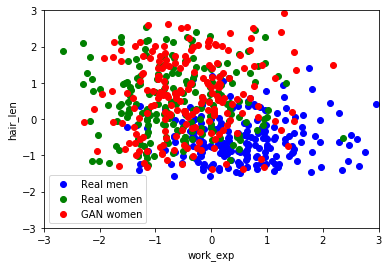

Epoch 19000 [D loss: 0.000029] [G loss: 0.000389]


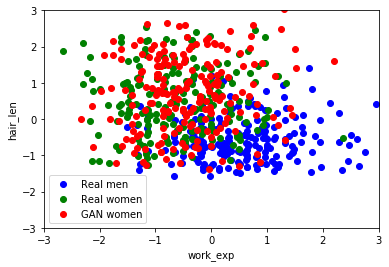

Epoch 20000 [D loss: 0.000043] [G loss: 0.000455]


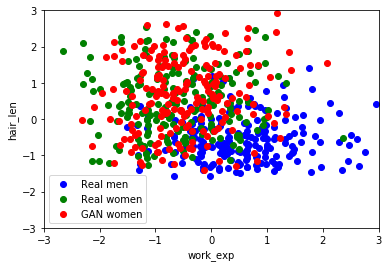

In [3]:
lambda_l1 = 1e-4

D, G, combined = create_gan_small(data_dim, trans_loss_func=squared_l1_loss, trans_loss_wt=lambda_l1)
train(D, G, combined, X1, X2, name1, name2, xlabel='work_exp', ylabel='hair_len', xlim=(-3,3), ylim=(-3,3))

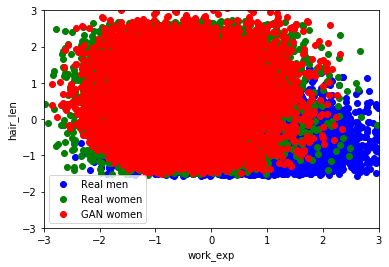

In [4]:
plot(X1, X2, G, name1, name2, num_pts_plot=data_size, xlabel='work_exp', ylabel='hair_len', xlim=(-3,3), ylim=(-3,3))

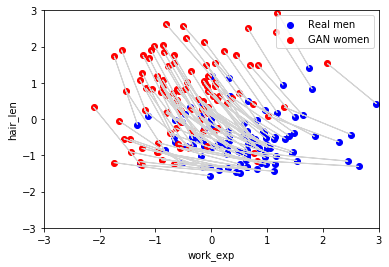

In [5]:
plot_changes(X1, G, name1, name2, xlabel='work_exp', ylabel='hair_len', xlim=(-3,3), ylim=(-3,3))

In [6]:
class Model:
    def predict(self, X):
        return np.dot(X, [1.4028, 1.1688]) > 0.8684

model = Model()

In [7]:
yhat1 = model.predict(X1)
yhat2 = model.predict(X2)
yhat_fake2 = model.predict(G.predict(X1))
print(yhat1.sum(), yhat2.sum())

2662 3049


# Flipsets

In [8]:
flipset_pn = X1[np.where(np.logical_and(yhat1, 1-yhat_fake2))]
flipset_np = X1[np.where(np.logical_and(1-yhat1, yhat_fake2))]
print(len(flipset_pn), len(flipset_np))

741 1010


In [9]:
sns.set(style='white')

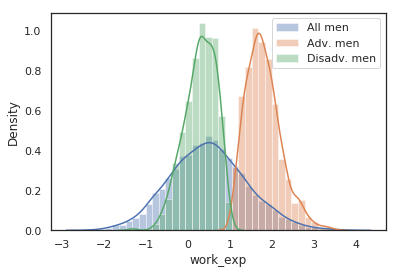

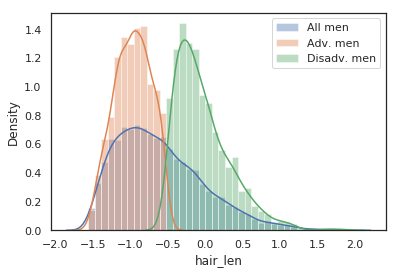

In [10]:
plot_dists(X1, flipset_pn, flipset_np, name1, columns)

# Transparency Reports

In [11]:
flipset_pn_change = G.predict(flipset_pn) - flipset_pn
print(flipset_pn_change.mean(axis=0))
print(flipset_pn_change.std(axis=0))

[-1.46572753  0.54185334]
[0.25303112 0.27146191]


In [12]:
flipset_np_change = G.predict(flipset_np) - flipset_np
print(flipset_np_change.mean(axis=0))
print(flipset_np_change.std(axis=0))

[-0.70004192  1.61018913]
[0.06589482 0.13157785]


# GAN Validation

In [13]:
X_fake2 = G.predict(X1)

In [14]:
from scipy.stats import ks_2samp as ks

#Kolmorogov-Smirnov distance between the real and generated marginals
for i, column in enumerate(columns):
    ks_result = ks(X2[:,i], X_fake2[:,i])
    print(column)
    print('Kolmorogov-Smirnov distance = {:.6f}'.format(ks_result.statistic))
    print()

work_exp
Kolmorogov-Smirnov distance = 0.038800

hair_len
Kolmorogov-Smirnov distance = 0.013500



In [15]:
np.mean(np.sum(np.abs(G.predict(X1) - X1), axis=1)) #average L1 distance between x and G(x)

2.1950113082885347